In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('series_data.csv')
df.head()

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          703 non-null    object 
 4   Runtime_of_Episodes  1957 non-null   object 
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                1999 non-null   object 
 11  Star4                1995 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [90]:
df.describe()

,IMDB_Rating,No_of_Votes
count,2000.000000,2.000000e+03
mean,7.591300,3.770391e+04
std,0.898731,8.843231e+04
min,1.000000,5.109000e+03
25%,7.200000,7.745500e+03
50%,7.700000,1.316100e+04
75%,8.200000,3.132200e+04
max,9.700000,1.773458e+06


In [91]:
df.shape

(2000, 13)

### Missing Values

In [92]:
df.isnull().sum()

Poster_Link               0
Series_Title              0
Runtime_of_Series         0
Certificate            1297
Runtime_of_Episodes      43
Genre                     0
IMDB_Rating               0
Overview                  0
Star1                     0
Star2                     0
Star3                     1
Star4                     5
No_of_Votes               0
dtype: int64

In [93]:
df['Certificate'].fillna("Unknown",inplace=True)

In [94]:
df['Success']=df['IMDB_Rating'].map(lambda x:1 if x>8 else 0)

In [95]:
### Runtime_of_Episodes is string Type ,We'll have to convert into int
df['Runtime_of_Episodes']=df['Runtime_of_Episodes'].fillna("Unknown")
df['Runtime_of_Episodes']=df['Runtime_of_Episodes'].map(lambda x:int(x.split()[0]) if x!="Unknown" else x)
df['Runtime_of_Episodes']=df['Runtime_of_Episodes'].apply(lambda x:0 if x=='Unknown' else x)
median_runtime=df['Runtime_of_Episodes'].median()

df['Runtime_of_Episodes']=df['Runtime_of_Episodes'].map(lambda x:median_runtime if x=='Unknown' else x)

In [96]:
df['Runtime_of_Episodes'].unique()


array([ 57,  49,  44,  22,  51,  88,  53,  55,  60,  62,  42,  23,  54,
        46,  43,  70,  40,  59,  45,  41,  24,  47,  56,  28,  58,  52,
        25,  64,  30,  27,  15,  48,  80,  11,  50, 175,   0,  95, 231,
       176,  90, 180,  35, 296,  21, 100, 195,  26,  12, 120,  34,   5,
        92, 133,  29, 535,  32,  20,  86,  89, 629,  10, 280,  74,  63,
       410, 510,  65, 107,  36,   7, 300, 384, 542, 152,   4, 566,   6,
       219, 181, 223, 420, 469,  39, 284, 720, 430, 123,  99, 522,   3,
        69, 701, 608,  75,  67,  18, 172, 293, 105, 325,  93, 190, 277,
       900,  16, 276,  68,  31], dtype=int64)

In [97]:
df['Star3'].fillna("Unknown",inplace=True)
df['Star4'].fillna("Unknown",inplace=True)

### Outlier Detection

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          2000 non-null   object 
 4   Runtime_of_Episodes  2000 non-null   int64  
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                2000 non-null   object 
 11  Star4                2000 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
 13  Success              2000 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 218.9+ KB


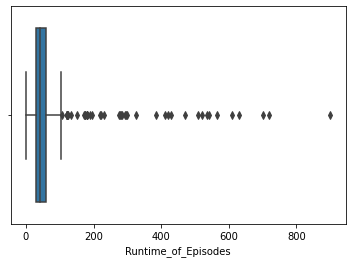

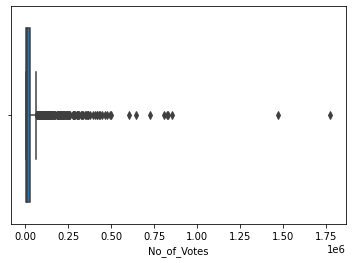

In [99]:
for i,col in enumerate(['Runtime_of_Episodes','No_of_Votes']):
    plt.figure(i)
    sns.boxplot(df[col])

In [100]:
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange

In [101]:
for col in ['Runtime_of_Episodes','No_of_Votes']:
    low,high=removeOutlier(df[col])
    df[col]=np.where(df[col]>high,high,df[col])
    df[col]=np.where(df[col]<low,low,df[col])

### Encoding Categorical Features

In [102]:
## We'll devide the Runtime_of_Series into start yr and end yr
df['Start_year']=df['Runtime_of_Series'].apply(lambda x:x[1:5])

In [103]:
df['End_Year']=df['Runtime_of_Series'].apply(lambda x:x[6:10] if len(x)>10 else "Present")

In [104]:
df.head()

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes,Success,Start_year,End_Year
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57.0,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,66686.75,1,2011,2019
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,66686.75,1,2008,2013
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,66686.75,1,2010,Present
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,66686.75,1,1994,2004
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,66686.75,1,2016,Present


In [105]:
start_yr=df['Start_year'].value_counts().to_dict()

In [106]:
end_yr=df['End_Year'].value_counts().to_dict()

In [107]:
df['End_Year']=df['End_Year'].apply(lambda x:"2"+x if '–' in x and x[0]=="0" else x)
df['End_Year']=df['End_Year'].apply(lambda x:"1"+x if '–' in x and x[0]=="9" else x)

In [108]:
df['End_Year']=df['End_Year'].apply(lambda x:x[:4] if x!="Present" else x)

In [109]:
df['Start_year']=df['Start_year'].map(start_yr)
df['End_Year']=df['End_Year'].map(end_yr)

In [110]:
df.drop('Runtime_of_Series',axis=1,inplace=True)

In [111]:
df.head()

,Poster_Link,Series_Title,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes,Success,Start_year,End_Year
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,A,57.0,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,66686.75,1,97,97
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,18,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,66686.75,1,52,66
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,18+,44.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,66686.75,1,76,656
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,13+,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,66686.75,1,21,25
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,15,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,66686.75,1,113,656


In [112]:
df['Certificate'].value_counts()

Unknown      1297
18            231
16            133
16+            49
15+            45
13             42
A              42
18+            41
U              29
12+            18
7              16
UA             14
PG             13
13+             9
All             6
Not Rated       6
15              4
7+              3
R               2
Name: Certificate, dtype: int64

In [113]:
top_10_certificates=list(df['Certificate'].value_counts().sort_values(ascending=False).nlargest(10).index)

In [114]:
top_10_certificates

['Unknown', '18', '16', '16+', '15+', '13', 'A', '18+', 'U', '12+']

In [115]:
for certificate in top_10_certificates:
    df[certificate]=np.where(df['Certificate']==certificate,1,0)

In [116]:
df.head()

,Poster_Link,Series_Title,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,...,Unknown,18,16,16+,15+,13,A,18+,U,12+
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,A,57.0,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,...,0,0,0,0,0,0,1,0,0,0
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,18,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,...,0,1,0,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,18+,44.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,...,0,0,0,0,0,0,0,1,0,0
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,13+,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,...,0,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,15,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df.drop('Certificate',axis=1,inplace=True)

In [118]:
### for all star features(Star1,Star2,Star3,Star4) we'll use target based encoding because there are so many 

star1_dict=df['Star1'].value_counts().to_dict()


In [119]:
list(df['Star1'].unique())

['Emilia Clarke',
 'Bryan Cranston',
 'Andrew Lincoln',
 'Jennifer Aniston',
 'Millie Bobby Brown',
 'Benedict Cumberbatch',
 'Johnny Galecki',
 'Michael C. Hall',
 'Josh Radnor',
 'Vince Vaughn',
 'Jorge Garcia',
 'Dominic Purcell',
 'Kevin Spacey',
 'Daniel Lapaine',
 'Katheryn Winnick',
 'Evan Rachel Wood',
 'Steve Carell',
 'Hugh Laurie',
 'Stephen Amell',
 'Jared Padalecki',
 'Justin Roiland',
 'Dan Castellaneta',
 'Gabriel Macht',
 'Charlie Cox',
 'Pedro Pascal',
 "Ed O'Neill",
 'Cillian Murphy',
 'Rami Malek',
 'Trey Parker',
 'Billy Bob Thornton',
 'Bob Odenkirk',
 'Claire Danes',
 'Grant Gustin',
 'Seth MacFarlane',
 'James Gandolfini',
 'Henry Cavill',
 'Úrsula Corberó',
 'Dominic West',
 'Louis Hofmann',
 'Nina Dobrev',
 'Taylor Schilling',
 'Lady Gaga',
 'Jason Bateman',
 'Charlie Hunnam',
 'Dylan Minnette',
 'Jerry Seinfeld',
 'Ellen Pompeo',
 'Dee Bradley Baker',
 'Karl Urban',
 'Nathan Fillion',
 'Jon Cryer',
 'Mamoru Miyano',
 'Zach Braff',
 'Tom Ellis',
 'Jack Coleman'

In [120]:
star1_dict

{'Rowan Atkinson': 7,
 'Ricky Gervais': 5,
 'Natsuki Hanae': 4,
 'Matthew Perry': 4,
 'Gordon Ramsay': 4,
 'Mel Blanc': 4,
 'Yoshitsugu Matsuoka': 3,
 "Chris O'Dowd": 3,
 'Steve Coogan': 3,
 'Christina Applegate': 3,
 "Conan O'Brien": 3,
 'Jason Isaacs': 3,
 'Matt LeBlanc': 3,
 'Sarah Paulson': 3,
 'Beren Saat': 3,
 'Jay Baruchel': 3,
 'Masako Nozawa': 3,
 'Eric McCormack': 3,
 'David Mitchell': 3,
 'Seth MacFarlane': 3,
 'Matt Lucas': 3,
 'Mark-Paul Gosselaar': 3,
 'Kyle Chandler': 3,
 'Rob Paulsen': 3,
 'Kiefer Sutherland': 3,
 'Peter Krause': 3,
 'Josh Duhamel': 3,
 'RuPaul': 3,
 'Melissa Joan Hart': 3,
 'Jim Cummings': 3,
 'Patricia Arquette': 3,
 'Scott Bakula': 3,
 'Çagatay Ulusoy': 3,
 'Steve Blum': 3,
 'Ali Atay': 3,
 'Shiri Appleby': 3,
 'Nathan Fillion': 3,
 'David Duchovny': 3,
 'Mamoru Miyano': 3,
 'Frank Welker': 3,
 'Amanda Bynes': 3,
 'Charlie Adler': 3,
 'Suranne Jones': 3,
 'Dee Bradley Baker': 2,
 'Rachel Brosnahan': 2,
 'Mike Judge': 2,
 'Kenan Imirzalioglu': 2,
 'Fa

In [121]:
df['Star1']=df['Star1'].map(star1_dict)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Episodes  2000 non-null   float64
 3   Genre                2000 non-null   object 
 4   IMDB_Rating          2000 non-null   float64
 5   Overview             2000 non-null   object 
 6   Star1                2000 non-null   int64  
 7   Star2                2000 non-null   object 
 8   Star3                2000 non-null   object 
 9   Star4                2000 non-null   object 
 10  No_of_Votes          2000 non-null   float64
 11  Success              2000 non-null   int64  
 12  Start_year           2000 non-null   int64  
 13  End_Year             2000 non-null   int64  
 14  Unknown              2000 non-null   int32  
 15  18                   2000 non-null   i

In [123]:
df['Genre'].unique()

array(['Action, Adventure, Drama', 'Crime, Drama, Thriller',
       'Drama, Horror, Thriller', 'Comedy, Romance',
       'Drama, Fantasy, Horror', 'Crime, Drama, Mystery',
       'Adventure, Drama, Fantasy', 'Action, Crime, Drama', 'Drama',
       'Drama, Sci-Fi, Thriller', 'Drama, Mystery, Sci-Fi', 'Comedy',
       'Drama, Mystery', 'Action, Adventure, Crime',
       'Animation, Adventure, Comedy', 'Animation, Comedy',
       'Comedy, Drama', 'Biography, Crime, Drama',
       'Comedy, Drama, Romance', 'Crime, Drama',
       'Action, Adventure, Fantasy', 'Action, Crime, Mystery',
       'Action, Adventure, Sci-Fi', 'Comedy, Crime, Drama',
       'Drama, Mystery, Thriller', 'Drama, Romance',
       'Animation, Action, Adventure', 'Action, Comedy, Crime',
       'Adventure, Drama, Sci-Fi', 'Animation, Crime, Drama',
       'Crime, Drama, Fantasy', 'Drama, Fantasy, Sci-Fi',
       'Drama, Fantasy, Mystery', 'Crime, Drama, Horror', 'Comedy, Crime',
       'Action, Adventure, Biography', 'A

In [124]:
### For Genre we'll take first genre (comma separated)
df['Genre1']=df['Genre'].map(lambda x:x.split(',')[0])
#df['Genre2']=df['Genre'].map(lambda x:x.split(',')[1])

In [125]:
df['Genre1'].value_counts()

Comedy         636
Drama          327
Animation      322
Action         284
Crime          248
Adventure       71
Documentary     34
Biography       21
Game-Show       16
Reality-TV      13
Family           7
Fantasy          4
Thriller         3
Short            3
Horror           2
Talk-Show        2
Mystery          2
Western          2
Music            1
Musical          1
Sci-Fi           1
Name: Genre1, dtype: int64

In [126]:
top_10_genres=list(df['Genre1'].value_counts().sort_values(ascending=False).nlargest(10).index)

In [127]:
top_10_genres

['Comedy',
 'Drama',
 'Animation',
 'Action',
 'Crime',
 'Adventure',
 'Documentary',
 'Biography',
 'Game-Show',
 'Reality-TV']

In [128]:
for genre in top_10_genres:
    df[genre]=np.where(df['Genre1']==genre,1,0)

In [129]:
df.head()

,Poster_Link,Series_Title,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,...,Comedy,Drama,Animation,Action,Crime,Adventure,Documentary,Biography,Game-Show,Reality-TV
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,57.0,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,1,Peter Dinklage,Kit Harington,Lena Headey,...,0,0,0,1,0,0,0,0,0,0
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,2,Aaron Paul,Anna Gunn,Betsy Brandt,...,0,0,0,0,1,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,44.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,1,Norman Reedus,Melissa McBride,Danai Gurira,...,0,1,0,0,0,0,0,0,0,0
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,2,Courteney Cox,Lisa Kudrow,Matt LeBlanc,...,1,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",1,Finn Wolfhard,Winona Ryder,David Harbour,...,0,1,0,0,0,0,0,0,0,0


In [130]:
df.drop(['Poster_Link','Series_Title','Genre','Overview','Genre1'],axis=1,inplace=True)

In [131]:
df.head()

,Runtime_of_Episodes,IMDB_Rating,Star1,Star2,Star3,Star4,No_of_Votes,Success,Start_year,End_Year,...,Comedy,Drama,Animation,Action,Crime,Adventure,Documentary,Biography,Game-Show,Reality-TV
0,57.0,9.3,1,Peter Dinklage,Kit Harington,Lena Headey,66686.75,1,97,97,...,0,0,0,1,0,0,0,0,0,0
1,49.0,9.5,2,Aaron Paul,Anna Gunn,Betsy Brandt,66686.75,1,52,66,...,0,0,0,0,1,0,0,0,0,0
2,44.0,8.2,1,Norman Reedus,Melissa McBride,Danai Gurira,66686.75,1,76,656,...,0,1,0,0,0,0,0,0,0,0
3,22.0,8.9,2,Courteney Cox,Lisa Kudrow,Matt LeBlanc,66686.75,1,21,25,...,1,0,0,0,0,0,0,0,0,0
4,51.0,8.7,1,Finn Wolfhard,Winona Ryder,David Harbour,66686.75,1,113,656,...,0,1,0,0,0,0,0,0,0,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Runtime_of_Episodes  2000 non-null   float64
 1   IMDB_Rating          2000 non-null   float64
 2   Star1                2000 non-null   int64  
 3   Star2                2000 non-null   object 
 4   Star3                2000 non-null   object 
 5   Star4                2000 non-null   object 
 6   No_of_Votes          2000 non-null   float64
 7   Success              2000 non-null   int64  
 8   Start_year           2000 non-null   int64  
 9   End_Year             2000 non-null   int64  
 10  Unknown              2000 non-null   int32  
 11  18                   2000 non-null   int32  
 12  16                   2000 non-null   int32  
 13  16+                  2000 non-null   int32  
 14  15+                  2000 non-null   int32  
 15  13                   2000 non-null   i

### Feature Selection

<AxesSubplot:>

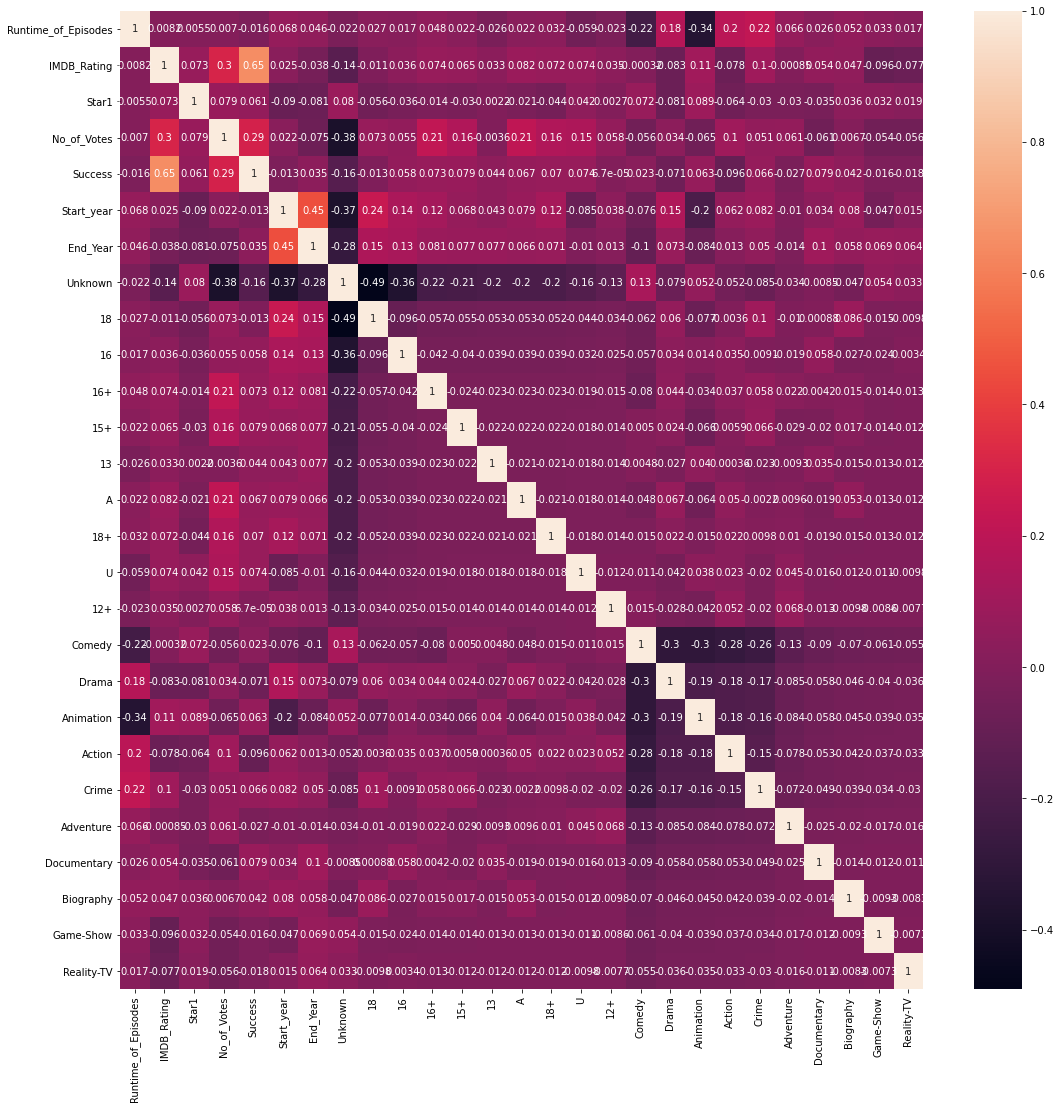

In [133]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

### Feature Importance

In [134]:
X=df.drop(['Success','IMDB_Rating','Star2','Star3','Star4'],axis=1)
y=df['Success']

In [135]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

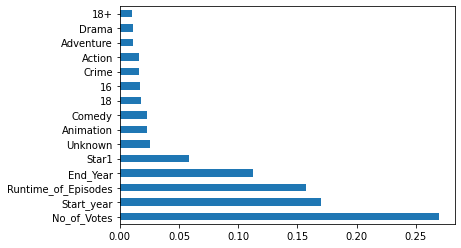

In [136]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.sort_values(ascending=False).nlargest(15).plot(kind='barh')

### Model Building

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
df['Success'].value_counts()

0    1334
1     666
Name: Success, dtype: int64

In [140]:
X=df.drop(['Success','IMDB_Rating','Star2','Star3','Star4'],axis=1)
y=df['Success']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
from sklearn.ensemble import RandomForestClassifier


In [143]:
rf=RandomForestClassifier()

In [144]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred=rf.predict(X_test)

In [146]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7375

In [147]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,3,4, 5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [148]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
y_pred=rf_randomcv.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(metrics.classification_report(y_test,y_pred)))


In [ ]:
X_test.head()

In [ ]:
X_test.columns

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('tv_success.pkl', 'wb')

# dump information to that file
pickle.dump(rf_randomcv, file)